In [1]:

# import the necessary libraries: 

import kagglehub
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

/Users/cholponzhakshylykova/Desktop/SDS/SDS-CP027-watt-wise/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# EDA

In [2]:
#------------ get the data -------------

# Download latest version
path = kagglehub.dataset_download("mrsimple07/energy-consumption-prediction")

print("Path to dataset files:", path)

#check the directory
print(os.listdir(path))

data = pd.read_csv(os.path.join(path, "Energy_consumption.csv"))

Path to dataset files: /Users/cholponzhakshylykova/.cache/kagglehub/datasets/mrsimple07/energy-consumption-prediction/versions/1
['processed_energy_consumption.csv', 'Energy_consumption.csv', 'feature_engineered_energy_consumption.csv', 'preprocessed_energy_consumption.csv']


In [3]:
# Check for missing or duplicated timestamps
missing_timestamps = data['Timestamp'].isnull().sum()
duplicated_timestamps = data['Timestamp'].duplicated().sum()

print(f"Missing timestamps: {missing_timestamps}")
print(f"Duplicated timestamps: {duplicated_timestamps}")

# Ensure timestamps are properly formatted and consistent
try:
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
    print("Timestamps are properly formatted.")
except Exception as e:
    print(f"Error in timestamp formatting: {e}")

Missing timestamps: 0
Duplicated timestamps: 0
Timestamps are properly formatted.


In [4]:

# Set the index to the Timestamp column for easier date manipulation
data_date_indexed = data.set_index('Timestamp')

#find the initial and the end date

print(f"Initial date: {data_date_indexed.index.min()}")
print(f"End date: {data_date_indexed.index.max()}")

#since the data is all synthetic it is okay to experiment with all the possible ways to analyze the data. 


Initial date: 2022-01-01 00:00:00
End date: 2022-02-11 15:00:00


       Temperature     Humidity  SquareFootage    Occupancy  RenewableEnergy  \
count  1000.000000  1000.000000    1000.000000  1000.000000      1000.000000   
mean     24.982026    45.395412    1500.052488     4.581000        15.132813   
std       2.836850     8.518905     288.418873     2.865598         8.745917   
min      20.007565    30.015975    1000.512661     0.000000         0.006642   
25%      22.645070    38.297722    1247.108548     2.000000         7.628385   
50%      24.751637    45.972116    1507.967426     5.000000        15.072296   
75%      27.418174    52.420066    1740.340165     7.000000        22.884064   
max      29.998671    59.969085    1999.982252     9.000000        29.965327   

       EnergyConsumption  
count        1000.000000  
mean           77.055873  
std             8.144112  
min            53.263278  
25%            71.544690  
50%            76.943696  
75%            82.921742  
max            99.201120  
                     Temperature   H

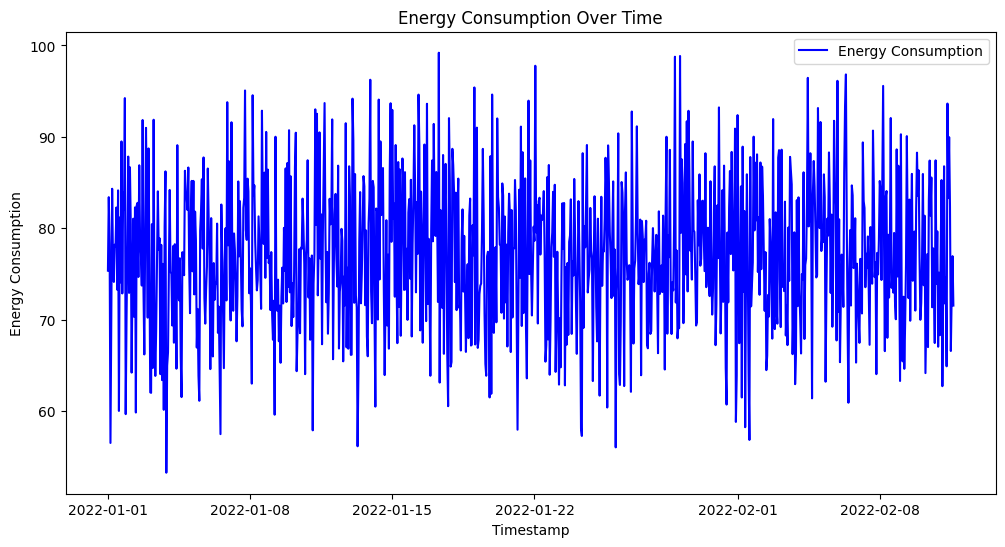

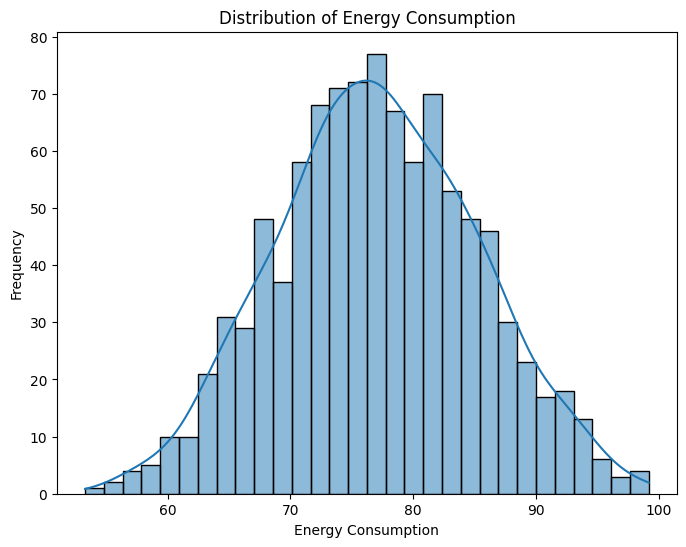

<Figure size 1200x600 with 0 Axes>

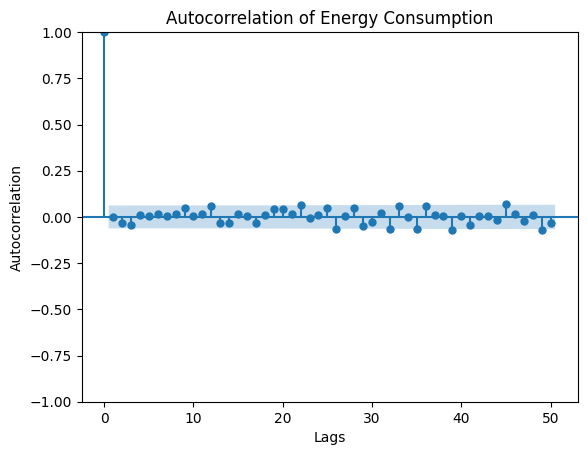

ADF Statistic: -31.576934146718358
p-value: 0.0
The time series is stationary.
                     Temperature   Humidity  SquareFootage  Occupancy  \
Timestamp                                                               
2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   
2022-01-01 03:00:00    20.080469  50.371637    1452.316318          1   
2022-01-01 04:00:00    23.097359  51.401421    1094.130359          9   

                    HVACUsage LightingUsage  RenewableEnergy  DayOfWeek  \
Timestamp                                                                 
2022-01-01 00:00:00        On           Off         2.774699     Monday   
2022-01-01 01:00:00        On            On        21.831384   Saturday   
2022-01-01 02:00:00       Off           Off         6.764672     Sunday   
2022-01-01 03:00:00       Off     

In [5]:
#describe the data
print(data_date_indexed.describe())
#head the data
print(data_date_indexed.head())
# Plot the energy consumption over time
plt.figure(figsize=(12, 6))
plt.plot(data_date_indexed['EnergyConsumption'], label='Energy Consumption', color='blue')
plt.title('Energy Consumption Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

# Plot the distribution of energy consumption
plt.figure(figsize=(8, 6))
sns.histplot(data_date_indexed['EnergyConsumption'], bins=30, kde=True)
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.show()

# Plot the autocorrelation of energy consumption
plt.figure(figsize=(12, 6))
plot_acf(data_date_indexed['EnergyConsumption'], lags=50)
plt.title('Autocorrelation of Energy Consumption')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation') 
plt.show()


# Perform Augmented Dickey-Fuller test for stationarity
result = adfuller(data_date_indexed['EnergyConsumption'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary. Differencing or transformation may be needed.")
# Save the processed data to a new CSV file
data_date_indexed.to_csv("processed_energy_consumption.csv")

# Display the first few rows of the processed data
print(data_date_indexed.head())
# Display the last few rows of the processed data
print(data_date_indexed.tail())
# Display the data types of the columns
print(data_date_indexed.dtypes)
# Display the shape of the dataset
print(f"Shape of the dataset: {data_date_indexed.shape}")
# Display the memory usage of the dataset
print(f"Memory usage of the dataset: {data_date_indexed.memory_usage(deep=True)} bytes")


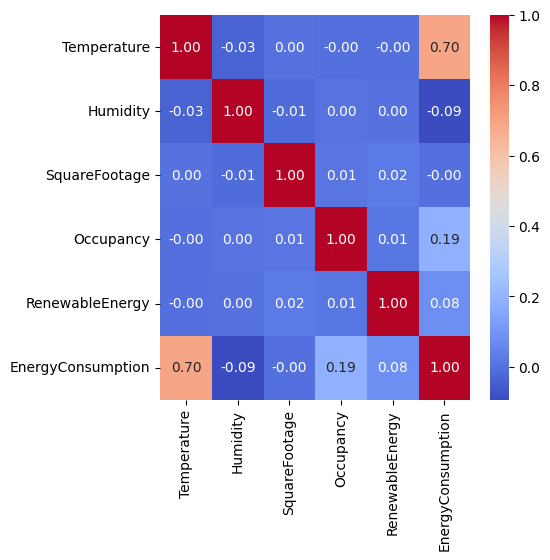

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          1000 non-null   datetime64[ns]
 1   Temperature        1000 non-null   float64       
 2   Humidity           1000 non-null   float64       
 3   SquareFootage      1000 non-null   float64       
 4   Occupancy          1000 non-null   int64         
 5   HVACUsage          1000 non-null   object        
 6   LightingUsage      1000 non-null   object        
 7   RenewableEnergy    1000 non-null   float64       
 8   DayOfWeek          1000 non-null   object        
 9   Holiday            1000 non-null   object        
 10  EnergyConsumption  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 86.1+ KB


<Figure size 640x480 with 0 Axes>

In [6]:


#correlation analysis
# %%
numeric_data = data.select_dtypes(include=["int64", "float64"]).columns
corr = data[numeric_data].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot= True, cmap="coolwarm", fmt = ".2f", cbar = True, linewidths = 0)
plt.show()
plt.savefig("correlation_matrix.png", dpi = 300, bbox_inches = "tight")

# there is a strong correlation for of Temperature with Energyconsumption
# %%

data.info()

Frequency of timestamps (seconds):
Timestamp
3600.0    999
Name: count, dtype: int64
Timestamps are regular.


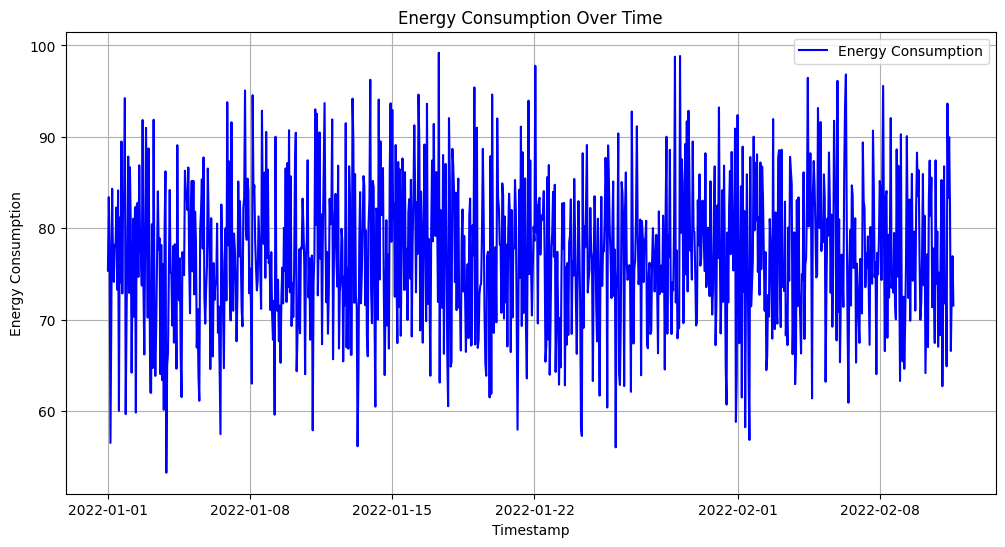

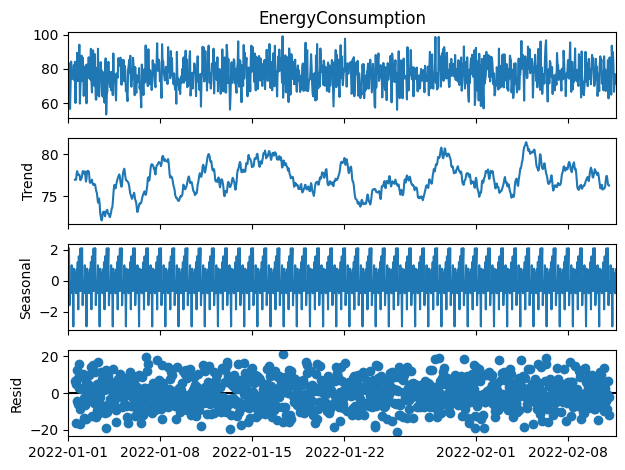

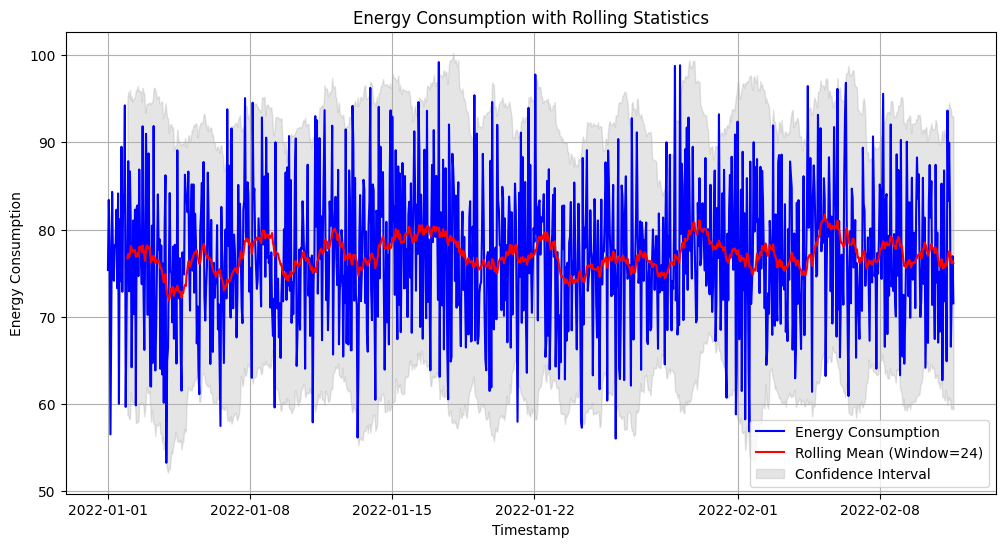

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assess data continuity and frequency of timestamps
timestamp_diff = data_date_indexed.index.to_series().diff().dt.total_seconds()
print("Frequency of timestamps (seconds):")
print(timestamp_diff.value_counts())

# Check for irregularities in timestamp frequency
if timestamp_diff.nunique() > 1:
    print("Irregular timestamp frequency detected.")
else:
    print("Timestamps are regular.")

# Explore seasonality, trends, and anomalies in energy consumption
plt.figure(figsize=(12, 6))
plt.plot(data_date_indexed.index, data_date_indexed['EnergyConsumption'], label='Energy Consumption', color='blue')
plt.title('Energy Consumption Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

# Seasonal decomposition using statsmodels

decomposition = seasonal_decompose(data_date_indexed['EnergyConsumption'], model='additive', period=24)
decomposition.plot()
plt.show()

# Highlight anomalies using rolling statistics
rolling_mean = data_date_indexed['EnergyConsumption'].rolling(window=24).mean()
rolling_std = data_date_indexed['EnergyConsumption'].rolling(window=24).std()

plt.figure(figsize=(12, 6))
plt.plot(data_date_indexed.index, data_date_indexed['EnergyConsumption'], label='Energy Consumption', color='blue')
plt.plot(data_date_indexed.index, rolling_mean, label='Rolling Mean (Window=24)', color='red')
plt.fill_between(data_date_indexed.index, rolling_mean - 2 * rolling_std, rolling_mean + 2 * rolling_std, color='gray', alpha=0.2, label='Confidence Interval')
plt.title('Energy Consumption with Rolling Statistics')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

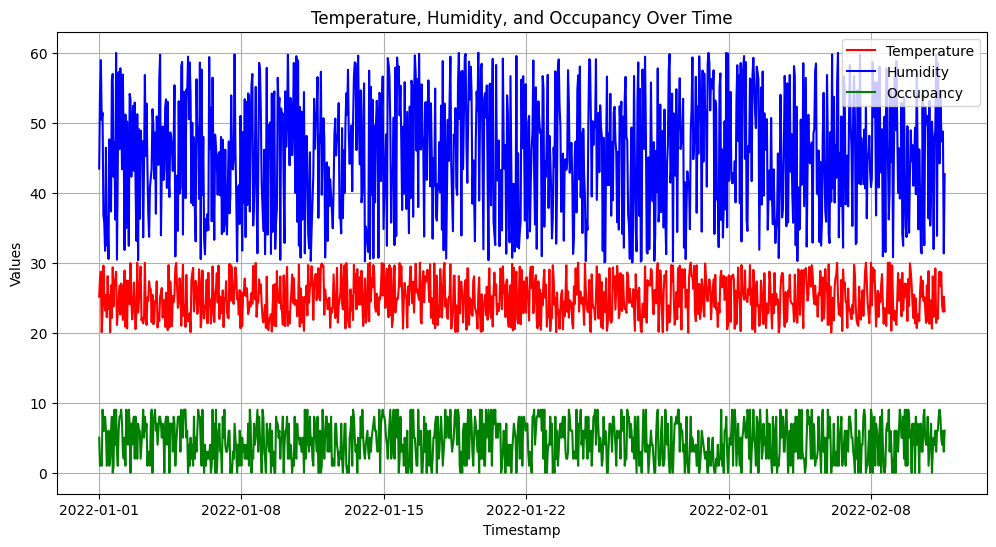

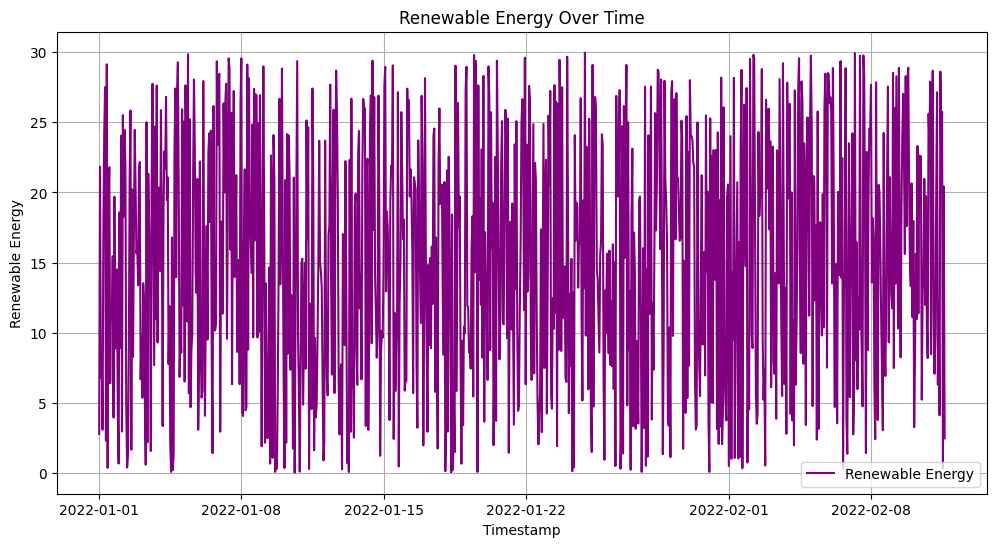

Feature-engineered data saved to: /Users/cholponzhakshylykova/.cache/kagglehub/datasets/mrsimple07/energy-consumption-prediction/versions/1/feature_engineered_energy_consumption.csv


In [8]:
# Feature Exploration & Engineering

# Create time-lagged features for EnergyConsumption
data_date_indexed['EnergyConsumption_lag_1'] = data_date_indexed['EnergyConsumption'].shift(1)

# Create rolling mean features for EnergyConsumption
data_date_indexed['EnergyConsumption_rolling_mean_24'] = data_date_indexed['EnergyConsumption'].rolling(window=24).mean()

# Create day-of-week indicators
data_date_indexed['DayOfWeek'] = data_date_indexed.index.dayofweek  # Monday=0, Sunday=6

# Investigate temperature, humidity, occupancy, HVAC, lighting usage, and renewable energy over time
plt.figure(figsize=(12, 6))
plt.plot(data_date_indexed.index, data_date_indexed['Temperature'], label='Temperature', color='red')
plt.plot(data_date_indexed.index, data_date_indexed['Humidity'], label='Humidity', color='blue')
plt.plot(data_date_indexed.index, data_date_indexed['Occupancy'], label='Occupancy', color='green')
plt.title('Temperature, Humidity, and Occupancy Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data_date_indexed.index, data_date_indexed['RenewableEnergy'], label='Renewable Energy', color='purple')
plt.title('Renewable Energy Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Renewable Energy')
plt.legend()
plt.grid(True)
plt.show()

# Save the updated dataset with new features
feature_engineered_path = os.path.join(path, "feature_engineered_energy_consumption.csv")
data_date_indexed.to_csv(feature_engineered_path)
print(f"Feature-engineered data saved to: {feature_engineered_path}")

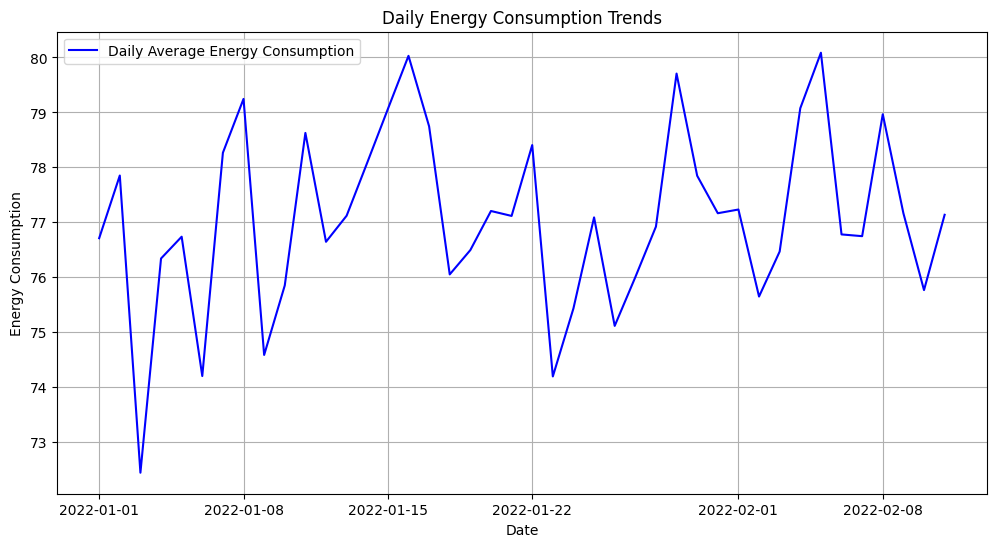

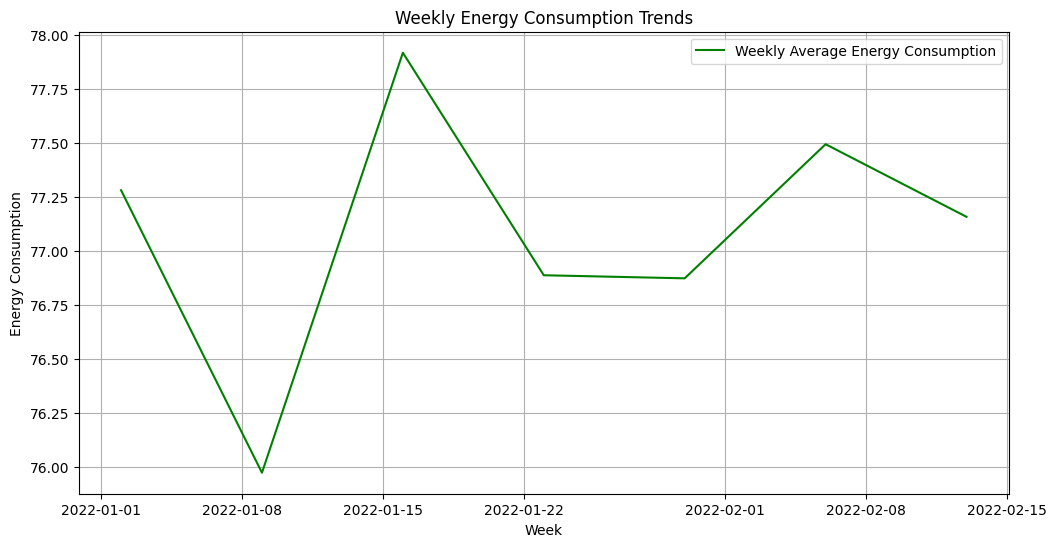

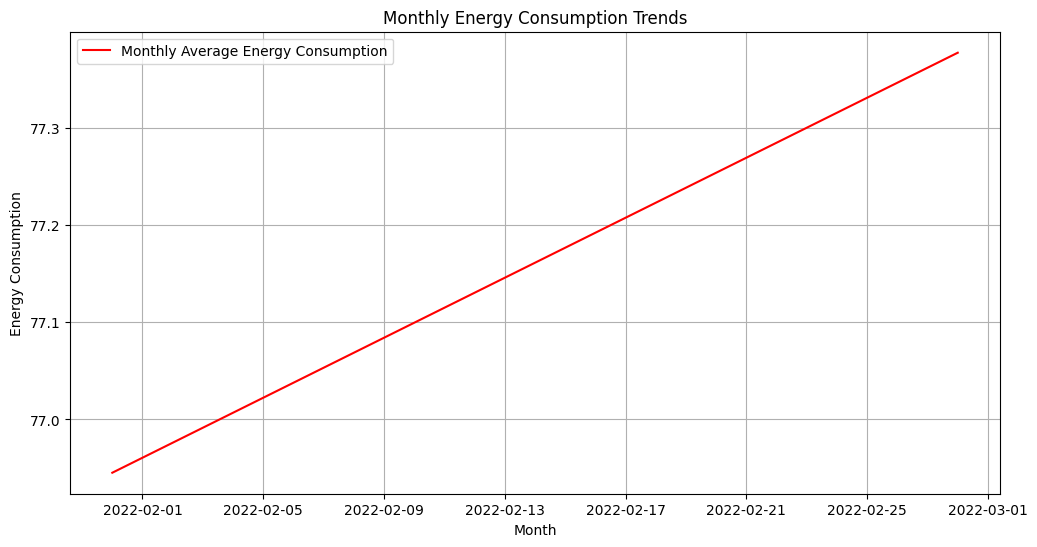

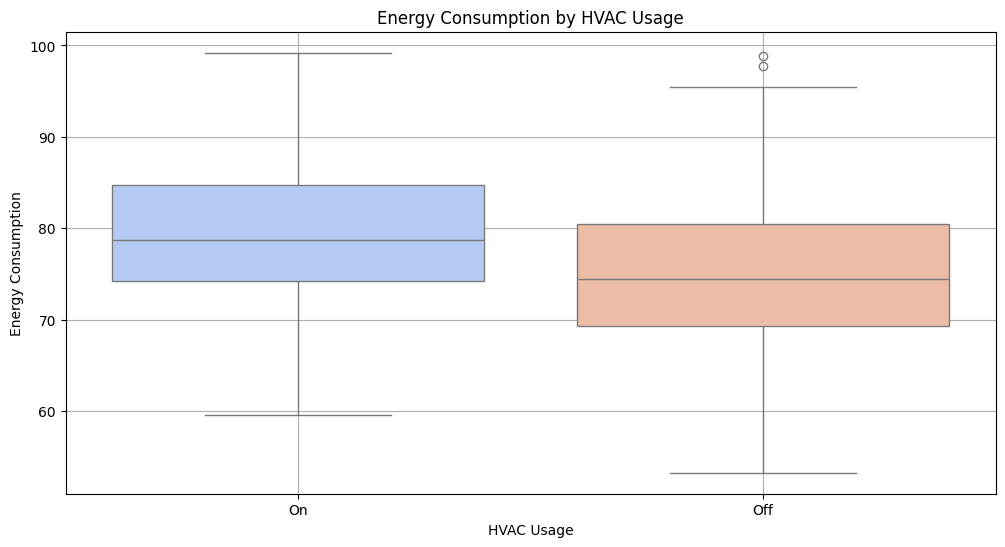

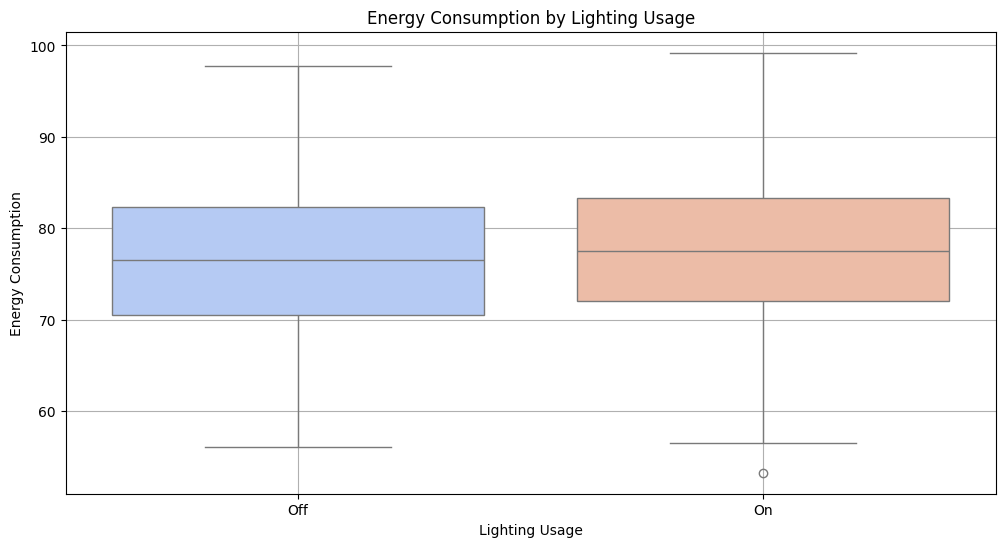

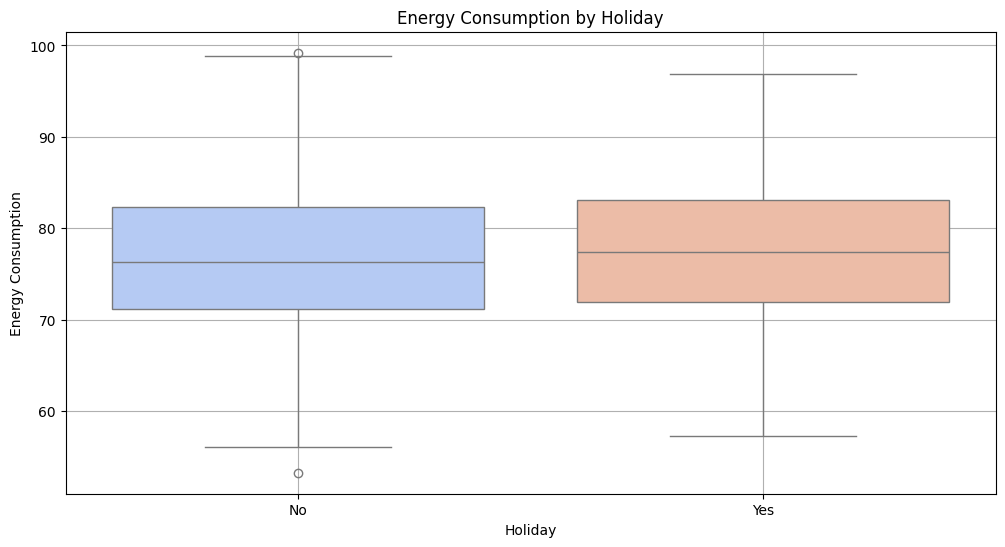

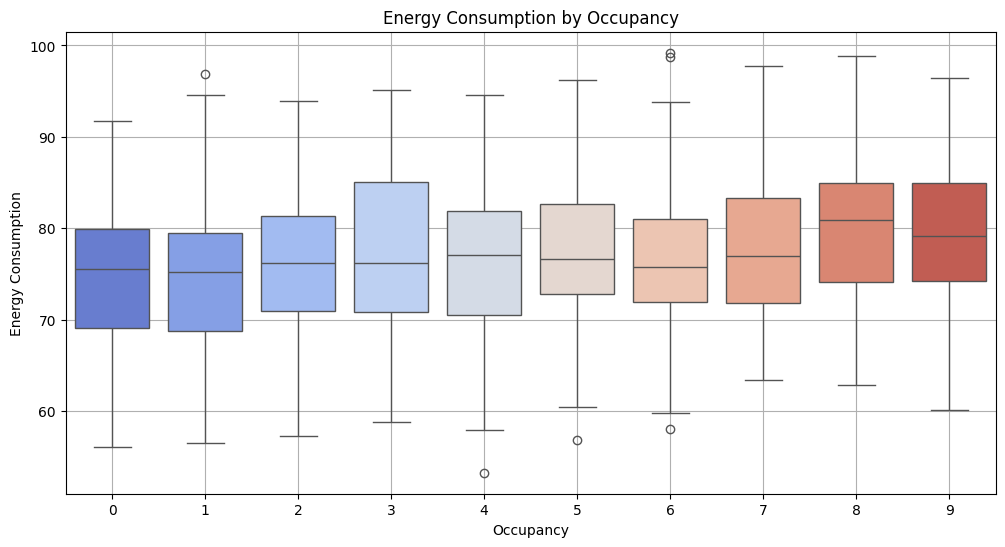

In [9]:
# Daily consumption trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_date_indexed.resample("D").mean(numeric_only=True), x=data_date_indexed.resample("D").mean(numeric_only=True).index, y="EnergyConsumption", label="Daily Average Energy Consumption", color="blue")
plt.title("Daily Energy Consumption Trends")
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.legend()
plt.grid(True)
plt.show()

# Weekly consumption trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_date_indexed.resample("W").mean(numeric_only=True), x=data_date_indexed.resample("W").mean(numeric_only=True).index, y="EnergyConsumption", label="Weekly Average Energy Consumption", color="green")
plt.title("Weekly Energy Consumption Trends")
plt.xlabel("Week")
plt.ylabel("Energy Consumption")
plt.legend()
plt.grid(True)
plt.show()

# Monthly consumption trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_date_indexed.resample("M").mean(numeric_only=True), x=data_date_indexed.resample("M").mean(numeric_only=True).index, y="EnergyConsumption", label="Monthly Average Energy Consumption", color="red")
plt.title("Monthly Energy Consumption Trends")
plt.xlabel("Month")
plt.ylabel("Energy Consumption")
plt.legend()
plt.grid(True)
plt.show()

# Peaks and dips relative to HVAC, lighting, holiday, and occupancy changes
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_date_indexed, x="HVACUsage", y="EnergyConsumption", palette="coolwarm")
plt.title("Energy Consumption by HVAC Usage")
plt.xlabel("HVAC Usage")
plt.ylabel("Energy Consumption")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_date_indexed, x="LightingUsage", y="EnergyConsumption", palette="coolwarm")
plt.title("Energy Consumption by Lighting Usage")
plt.xlabel("Lighting Usage")
plt.ylabel("Energy Consumption")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_date_indexed, x="Holiday", y="EnergyConsumption", palette="coolwarm")
plt.title("Energy Consumption by Holiday")
plt.xlabel("Holiday")
plt.ylabel("Energy Consumption")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_date_indexed, x="Occupancy", y="EnergyConsumption", palette="coolwarm")
plt.title("Energy Consumption by Occupancy")
plt.xlabel("Occupancy")
plt.ylabel("Energy Consumption")
plt.grid(True)
plt.show()

In [10]:
from scipy.stats import boxcox

# Fill or interpolate missing time periods
data_date_indexed = data_date_indexed.asfreq('H')  # Ensure hourly frequency
data_date_indexed['EnergyConsumption'] = data_date_indexed['EnergyConsumption'].interpolate(method='linear')  # Linear interpolation for missing values

# Create lagged features
data_date_indexed['EnergyConsumption_lag_2'] = data_date_indexed['EnergyConsumption'].shift(2)
data_date_indexed['EnergyConsumption_lag_3'] = data_date_indexed['EnergyConsumption'].shift(3)

# Create rolling statistics
data_date_indexed['EnergyConsumption_rolling_mean_48'] = data_date_indexed['EnergyConsumption'].rolling(window=48).mean()
data_date_indexed['EnergyConsumption_rolling_std_48'] = data_date_indexed['EnergyConsumption'].rolling(window=48).std()

# Create day-of-week and holiday encodings
data_date_indexed['IsWeekend'] = data_date_indexed['DayOfWeek'].apply(lambda x: 1 if x in [5, 6] else 0)  # 5=Saturday, 6=Sunday
data_date_indexed['IsHoliday'] = data_date_indexed['Holiday'].apply(lambda x: 1 if x == 'Yes' else 0)

# Examine potential transformations

# Apply Box-Cox transformation to stabilize variance
data_date_indexed['EnergyConsumption_BoxCox'], lambda_boxcox = boxcox(data_date_indexed['EnergyConsumption'].clip(lower=1))  # Clip to avoid negative values
print(f"Box-Cox lambda: {lambda_boxcox}")

# Save the updated dataset with new features

data_date_indexed.to_csv("preprocessed_energy_consumption.csv")


Box-Cox lambda: 0.8657394961328206
Preprocessed data saved to: /Users/cholponzhakshylykova/.cache/kagglehub/datasets/mrsimple07/energy-consumption-prediction/versions/1/preprocessed_energy_consumption.csv


## Model Development 

## Baseline & Classical Models

### Baseline Forecasts
- Implement naive forecasts where the prediction for the next time step is the value of the current time step.
- Use moving average forecasts to smooth the data and predict future values based on past observations.

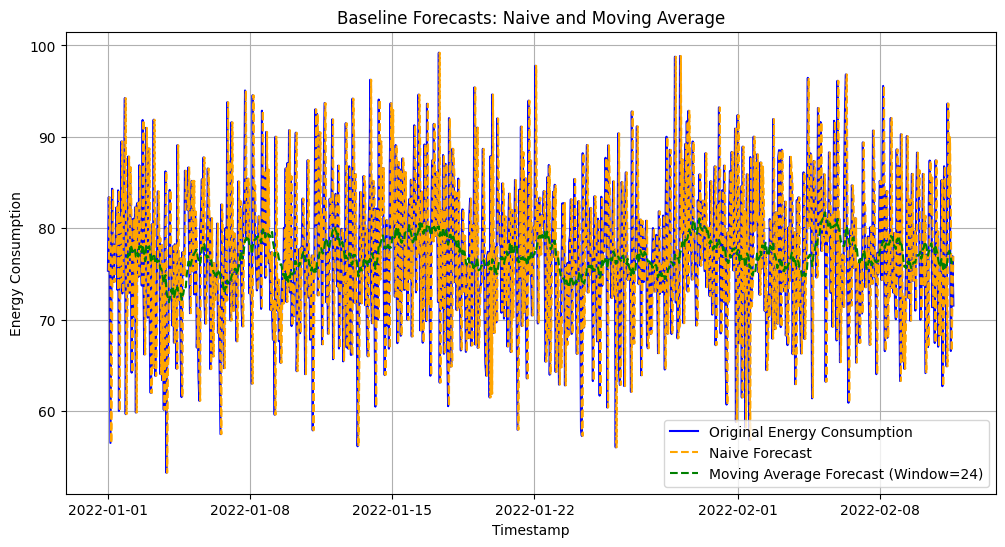

In [11]:
# Naive Forecast: Prediction for the next time step is the value of the current time step
data_date_indexed['NaiveForecast'] = data_date_indexed['EnergyConsumption'].shift(1)

# Moving Average Forecast: Smooth the data and predict future values based on past observations
window_size = 24  # Example: 24-hour moving average
data_date_indexed['MovingAverageForecast'] = data_date_indexed['EnergyConsumption'].rolling(window=window_size).mean()

# Plot the original data, naive forecast, and moving average forecast
plt.figure(figsize=(12, 6))
plt.plot(data_date_indexed.index, data_date_indexed['EnergyConsumption'], label='Original Energy Consumption', color='blue')
plt.plot(data_date_indexed.index, data_date_indexed['NaiveForecast'], label='Naive Forecast', linestyle='--', color='orange')
plt.plot(data_date_indexed.index, data_date_indexed['MovingAverageForecast'], label=f'Moving Average Forecast (Window={window_size})', linestyle='--', color='green')
plt.title('Baseline Forecasts: Naive and Moving Average')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

### Statistical Models
- Build ARIMA/SARIMA models to capture trends, seasonality, and autocorrelation in the time series data.
- Incorporate exogenous variables such as HVAC usage, occupancy, and other features to improve model accuracy.
- Evaluate model performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and Mean Absolute Percentage Error (MAPE).

Mean Absolute Error (MAE): 6.235493049227885
Mean Squared Error (MSE): 59.24540745417786
Mean Absolute Percentage Error (MAPE): 0.08158431312203891


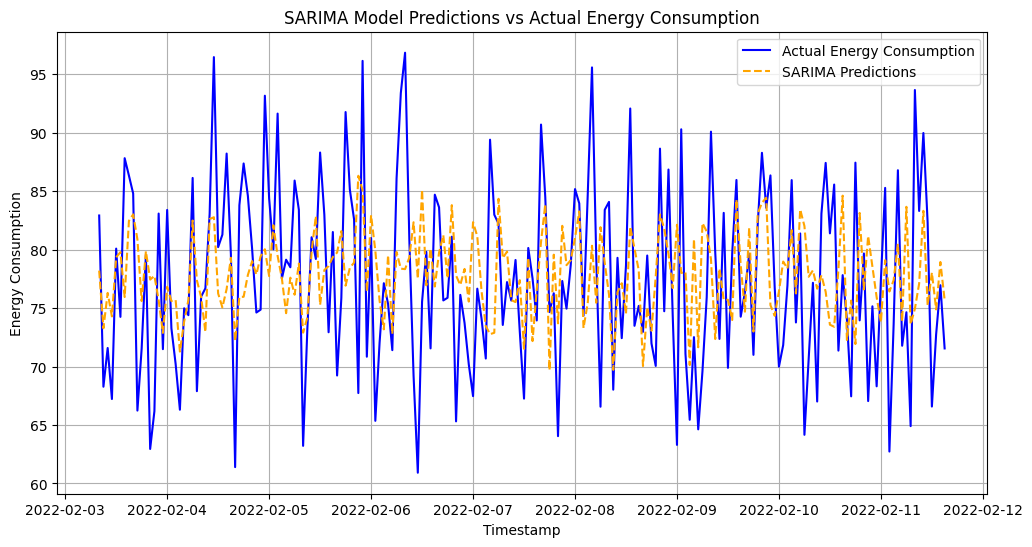

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import pandas as pd

# Prepare exogenous variables (convert categorical to dummies and ensure float dtype)
exogenous_vars = pd.get_dummies(
    data_date_indexed[['HVACUsage', 'Occupancy', 'LightingUsage', 'RenewableEnergy', 'IsWeekend', 'IsHoliday']],
    drop_first=True
).astype(float)

# Split data into training and test sets
train_size = int(len(data_date_indexed) * 0.8)
train_data = data_date_indexed['EnergyConsumption'][:train_size].astype(float)
test_data = data_date_indexed['EnergyConsumption'][train_size:].astype(float)
train_exog = exogenous_vars[:train_size]
test_exog = exogenous_vars[train_size:]

# Align indices to avoid misalignment issues
train_exog.index = train_data.index
test_exog.index = test_data.index

# Fit SARIMAX model
sarima_model = SARIMAX(train_data, exog=train_exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
sarima_fit = sarima_model.fit(disp=False)

# Forecast
predictions = sarima_fit.predict(start=len(train_data), end=len(data_date_indexed)-1, exog=test_exog)

# Evaluation metrics
mae = mean_absolute_error(test_data, predictions)
mse = mean_squared_error(test_data, predictions)
mape = mean_absolute_percentage_error(test_data, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual Energy Consumption', color='blue')
plt.plot(test_data.index, predictions, label='SARIMA Predictions', color='orange', linestyle='--')
plt.title('SARIMA Model Predictions vs Actual Energy Consumption')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()
